Saving IMAGE OF TASK 02 .jpeg to IMAGE OF TASK 02 .jpeg
Total Number of Objects Detected = 77


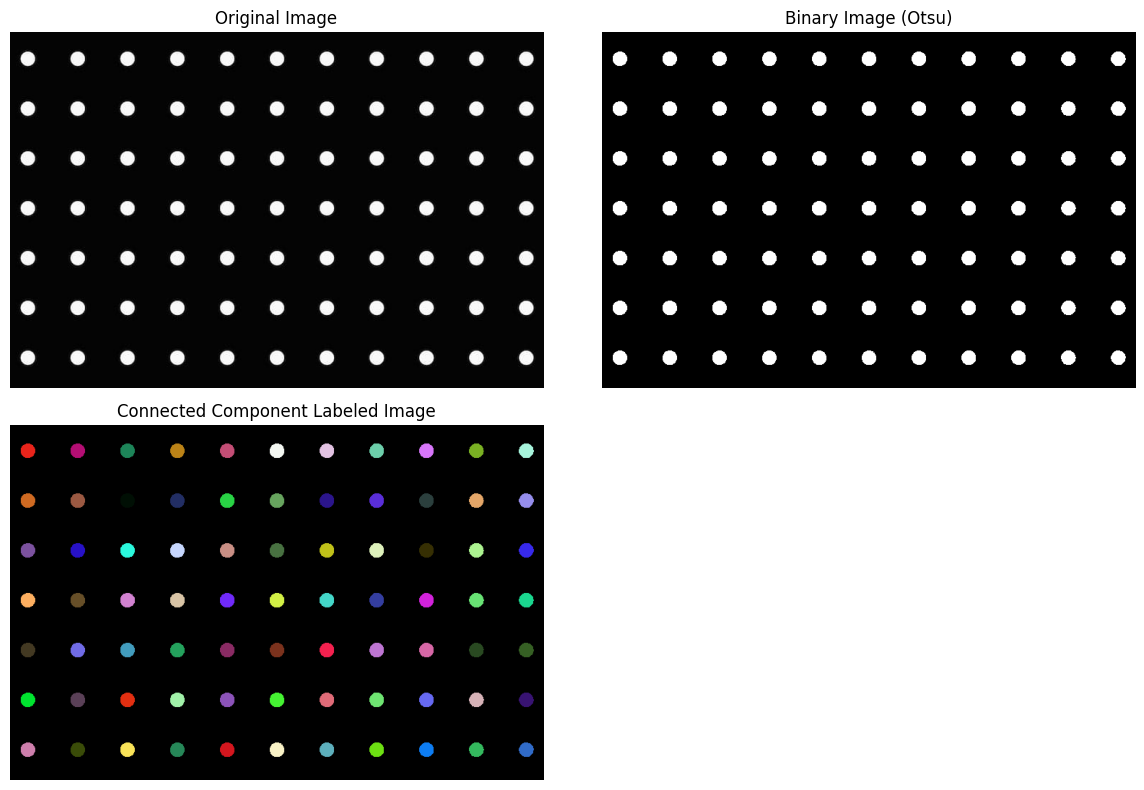

In [2]:
# Import required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image and convert to RGB
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not loaded! Check the file format or path.")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 3: Convert to Grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Step 4: Convert to Binary using Otsu's thresholding
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Connected Components for object counting
num_labels, labels = cv2.connectedComponents(binary)
total_objects = num_labels - 1  # subtract background
print(f"Total Number of Objects Detected = {total_objects}")

# Step 6: Create a colored label image for visualization
label_colored = np.zeros((labels.shape[0], labels.shape[1], 3))
for label in range(1, num_labels):  # skip background
    label_colored[labels == label] = np.random.rand(3)

# Step 7: Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image (Otsu)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(label_colored)
plt.title("Connected Component Labeled Image")
plt.axis("off")

plt.tight_layout()
plt.show()